In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
from config import api_key
import pprint as pp
import matplotlib.pyplot as plt


In [283]:
#read excel files
dispensary_df = pd.read_csv("CO Recreational Marijuana Stores.csv")

license = dispensary_df['License #']
street = dispensary_df['Street']
city = dispensary_df['City ']
zip = dispensary_df['Zip']

dispensary_df = pd.DataFrame({
    
    "License": license,
    "Street": street,
    "City": city,
    "Zipcode": zip,
})

zips_in_city = dispensary_df.groupby('City')['Zipcode'].unique()

dispensary_df.head()


,License,Street,City,Zipcode
0,402R-00763,10185 West 49th Avenue,Wheat Ridge,80033
1,402R-00581,17034 Highway 17,Moffat,81143
2,402R-00081,"1617 Wazee Street, Unit B",Denver,80202
3,402R-00757,2800 West Hampden Avenue,Sheridan,80110
4,402R-00664,155 North Federal Boulevard,Denver,80219


In [300]:
# income df
income_2012_df = pd.read_csv("Income/income_2012.csv")
income_2013_df = pd.read_csv("Income/income_2013.csv")
income_2014_df = pd.read_csv("Income/income_2014.csv")
income_2015_df = pd.read_csv("Income/income_2015.csv")
income_2016_df = pd.read_csv("Income/income_2016.csv")


zip = income_2012_df['Id2']

house_hold_12 = income_2012_df['Households; Estimate; Total']
house_hold_margin_12 = income_2012_df['Households; Margin of Error; Total']
house_hold_income_12 = income_2012_df['Households; Estimate; Median income (dollars)']
household_income_12 = pd.to_numeric(house_hold_income_12, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_12 = income_2012_df['Households; Margin of Error; Median income (dollars)']


house_hold_13 = income_2013_df['Households; Estimate; Total']
house_hold_margin_13 = income_2013_df['Households; Margin of Error; Total']
house_hold_income_13 = income_2013_df['Households; Estimate; Median income (dollars)']
household_income_13 = pd.to_numeric(house_hold_income_13, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_13 = income_2013_df['Households; Margin of Error; Median income (dollars)']

house_hold_14 = income_2014_df['Households; Estimate; Total']
house_hold_margin_14 = income_2014_df['Households; Margin of Error; Total']
house_hold_income_14 = income_2014_df['Households; Estimate; Median income (dollars)']
household_income_14 = pd.to_numeric(house_hold_income_14, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_14 = income_2014_df['Households; Margin of Error; Median income (dollars)']

house_hold_15 = income_2015_df['Households; Estimate; Total']
house_hold_margin_15 = income_2015_df['Households; Margin of Error; Total']
house_hold_income_15 = income_2015_df['Households; Estimate; Median income (dollars)']
household_income_15 = pd.to_numeric(house_hold_income_15, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_15 = income_2015_df['Households; Margin of Error; Median income (dollars)']

house_hold_16 = income_2016_df['Households; Estimate; Total']
house_hold_margin_16 = income_2016_df['Households; Margin of Error; Total']
house_hold_income_16 = income_2016_df['Households; Estimate; Median income (dollars)']
household_income_16 = pd.to_numeric(house_hold_income_16, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_16 = income_2016_df['Households; Margin of Error; Median income (dollars)']


income_clean_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Households 2012": house_hold_12,
    "Total Households Income 2012": household_income_12,
    
    "Total Households 2013": house_hold_13,
    "Total Households Income 2013": household_income_13,
    
    "Total Households 2014": house_hold_14,
    "Total Households Income 2014": household_income_14,
    
    "Total Households 2015": house_hold_15,
    "Total Households Income 2015": household_income_15,
    
    "Total Households 2016": house_hold_16,
    "Total Households Income 2016": household_income_16,
})
income_clean_df.head()

,Zipcode,Total Households 2012,Total Households Income 2012,Total Households 2013,Total Households Income 2013,Total Households 2014,Total Households Income 2014,Total Households 2015,Total Households Income 2015,Total Households 2016,Total Households Income 2016
0,67879.0,493.0,52212.0,493.0,52847.0,471.0,51023.0,487.0,47750.0,478,47000
1,80002.0,8264.0,49036.0,8304.0,50425.0,8107.0,51027.0,8227.0,48627.0,8196,53186
2,80003.0,13639.0,56398.0,13630.0,54688.0,13844.0,56833.0,14198.0,57934.0,13970,59098
3,80004.0,14527.0,66043.0,14502.0,67830.0,14759.0,67371.0,14814.0,67824.0,14915,70968
4,80005.0,10315.0,83125.0,10243.0,84501.0,10396.0,83819.0,10671.0,84900.0,10923,89189


In [301]:
city_zip_df = pd.merge(dispensary_df, income_clean_df, how="left")
city_zip_df.sort_values(by=["Total Households Income 2012"], ascending=True)


,License,Street,City,Zipcode,Total Households 2012,Total Households Income 2012,Total Households 2013,Total Households Income 2013,Total Households 2014,Total Households Income 2014,Total Households 2015,Total Households Income 2015,Total Households 2016,Total Households Income 2016
54,402R-00511,327 Main Street,San Luis,81152,515.0,25094.0,503.0,24087.0,519.0,31875.0,560.0,35142.0,562,25795
274,402R-00429,205 Main Street,San Luis,81152,515.0,25094.0,503.0,24087.0,519.0,31875.0,560.0,35142.0,562,25795
404,402R-00755,1709 Swink Avenue,Rocky Ford,81067,2447.0,25755.0,2373.0,28212.0,2363.0,32478.0,2409.0,32488.0,2363,35918
308,402R-00765,1315 Elm Avenue,Rocky Ford,81067,2447.0,25755.0,2373.0,28212.0,2363.0,32478.0,2409.0,32488.0,2363,35918
72,402R-00463,"973 U.S. Highway 85 87, Suite 100",Walsenburg,81089,1874.0,27381.0,1868.0,29054.0,1814.0,28575.0,1947.0,28814.0,1976,28135
524,402R-00760,25462 US Highway 160,Walsenburg,81089,1874.0,27381.0,1868.0,29054.0,1814.0,28575.0,1947.0,28814.0,1976,28135
329,402R-00739,10232 Interstate 25,Walsenburg,81089,1874.0,27381.0,1868.0,29054.0,1814.0,28575.0,1947.0,28814.0,1976,28135
210,402R-00547,5320 US Highway 285,Antonito,81120,880.0,28462.0,861.0,28036.0,870.0,26935.0,797.0,30809.0,806,28284
19,402R-00482,315 Main Street,Antonito,81120,880.0,28462.0,861.0,28036.0,870.0,26935.0,797.0,30809.0,806,28284
10,402R-00471,106 East 4th Avenue,Antonito,81120,880.0,28462.0,861.0,28036.0,870.0,26935.0,797.0,30809.0,806,28284


In [317]:
before_after_df = pd.DataFrame({
    "License" : city_zip_df["License"],
    "City" : city_zip_df["City"],
    "Zipcode" : city_zip_df["Zipcode"],
    "Median Income Before" : (city_zip_df["Total Households Income 2012"] + city_zip_df["Total Households Income 2013"]) / 2,
    "Median Income After" : (city_zip_df["Total Households Income 2014"] + city_zip_df["Total Households Income 2015"] + city_zip_df["Total Households Income 2016"]) / 3

})
before_after_df.sort_values(by=["Median Income Before"], ascending=False)


,License,City,Zipcode,Median Income Before,Median Income After
414,402R-00316,Aurora,80016,101726.5,104466.666667
254,402R-00304,Aurora,80016,101726.5,104466.666667
260,402R-00590,Denver,80127,97794.0,101950.666667
83,402R-00631,Thornton,80602,96141.5,98963.333333
440,402R-00214,Louisville,80027,94450.5,103754.333333
116,402R-00203,Louisville,80027,94450.5,103754.333333
233,402R-00574,Tabernash,80478,86302.5,85896.000000
243,402R-00354,Tabernash,80478,86302.5,85896.000000
189,402R-00679,Grant,80448,82669.5,38612.666667
483,402R-00666,Aurora,80015,80662.5,84700.333333


In [308]:
before_after_df.dtypes

License                  object
City                     object
Zipcode                   int64
Median Income Before    float64
Median Income After     float64
dtype: object

In [371]:
grouped = before_after_df.groupby(["Zipcode"]).count()["License"]
grouped.sort_values()

Zipcode
80448     1
80236     1
80249     1
80440     1
80444     1
80467     1
80476     1
80215     1
80482     1
80498     1
80504     1
80237     1
80543     1
80602     1
80749     1
80521     1
80247     1
81155     1
80127     1
80017     1
81631     1
81131     1
81019     1
80113     1
80123     1
81063     1
80304     2
80438     2
80420     2
80421     2
         ..
80212     5
81321     6
80022     6
81006     6
80246     6
81004     6
81611     7
80214     7
81601     7
81230     7
80303     7
80202     7
80301     7
80524     7
81635     7
80211     8
81301     8
80220     9
80239    10
80205    10
80302    10
81007    11
80203    12
80219    13
80204    13
80501    16
80210    17
80223    19
81082    23
80216    24
Name: License, Length: 127, dtype: int64

In [380]:
zipcode_groups = before_after_df["Zipcode"].unique()
dispensary_count = before_after_df.groupby(["Zipcode"]).count()["License"]
median_income_before = before_after_df.groupby(["Zipcode"])["Median Income Before"]
median_income_after = before_after_df.groupby(["Zipcode"])["Median Income After"]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, lowest_income_before, bar_width,
                 alpha=opacity,
                 color='b',
                label = "Before")
rects2 = plt.bar(index + bar_width, lowest_income_after, bar_width,
                 alpha=opacity,
                 color='g',
                label = "After")
plt.xlabel("Lowest Income Zip Code")
plt.ylabel("Median Household Income")
plt.title("Lowest Income Zip Code Median Household Income")
plt.xticks(index + bar_width, ("81152", "81067", "81089", "81120", "80705"))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../Lowest Income Zip Before and After.png")    
plt.show()

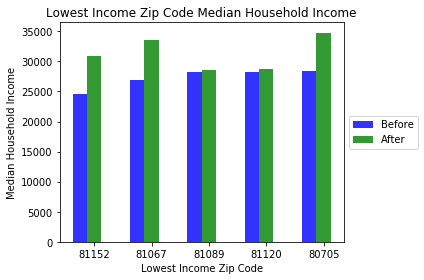

In [333]:
n_groups = 5
lowest_income_before = (24590.5, 26983.5, 28217.5, 28249,28469)
lowest_income_after = (30937.3, 33628, 28508, 28676, 34752.3)


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, lowest_income_before, bar_width,
                 alpha=opacity,
                 color='b',
                label = "Before")
rects2 = plt.bar(index + bar_width, lowest_income_after, bar_width,
                 alpha=opacity,
                 color='g',
                label = "After")
plt.xlabel("Lowest Income Zip Code")
plt.ylabel("Median Household Income")
plt.title("Lowest Income Zip Code Median Household Income")
plt.xticks(index + bar_width, ("81152", "81067", "81089", "81120", "80705"))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../Lowest Income Zip Before and After.png")    
plt.show()

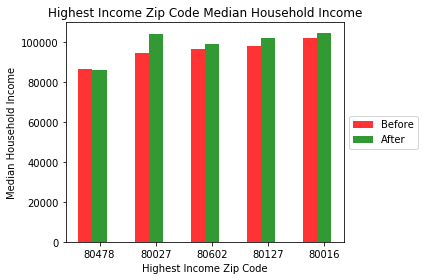

In [334]:
n_groups = 5
highest_income_before = (86302.5, 94450.5, 96141.5, 97794, 101726.5)
highest_income_after = (85896, 103754.3, 98963.3, 101950.7, 104466.7)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, highest_income_before, bar_width,
                 alpha=opacity,
                 color='r',
                label = "Before")
rects2 = plt.bar(index + bar_width, highest_income_after, bar_width,
                 alpha=opacity,
                 color='g',
                label = "After")
plt.xlabel("Highest Income Zip Code")
plt.ylabel("Median Household Income")
plt.title("Highest Income Zip Code Median Household Income")
plt.xticks(index + bar_width, ("80478", "80027", "80602", "80127", "80016"))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../Highest Income Zip Before and After.png")    
plt.show()

In [229]:
city_zip_df.groupby(["City"]).sum()["Total Households Income 2012"]


City
Alma                   89376.0
Antonito               85386.0
Aspen                 467929.0
Aurora               1219835.0
Avon                  221952.0
Bailey                141740.0
Basalt                147540.0
Berthoud              161974.0
Black Hawk            124524.0
Boulder              1424929.0
Breckenridge          253604.0
Carbondale            249652.0
Central City          209635.0
Colorado City          38614.0
Commerce City         340122.0
Cortez                251274.0
Crested Butte         260000.0
Crestone               32500.0
De Beque              250832.0
Denver               8354700.0
Dillon                174723.0
Dinosaur              125115.0
Dumont                173943.0
Durango               624618.0
Eagle                  78506.0
Edgewater             205410.0
Edwards               151552.0
Empire                 67500.0
Englewood              93811.0
Fairplay               57179.0
                       ...    
Mountain View         112100.0
Ned

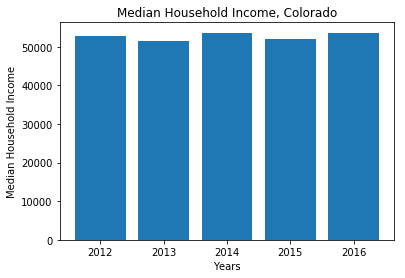

In [177]:
years = ["2012", "2013", "2014", "2015", "2016"]
income = [total_2012, total_2013, total_2014, total_2015, total_2016]
x_axis = np.arange(len(years))
plt.bar(x_axis, income)
plt.title("Median Household Income, Colorado")
plt.xlabel("Years")
plt.ylabel("Median Household Income")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2012", "2013", "2014", "2015", "2016"])
plt.savefig("../Median Household Income, CO.png")
plt.show()

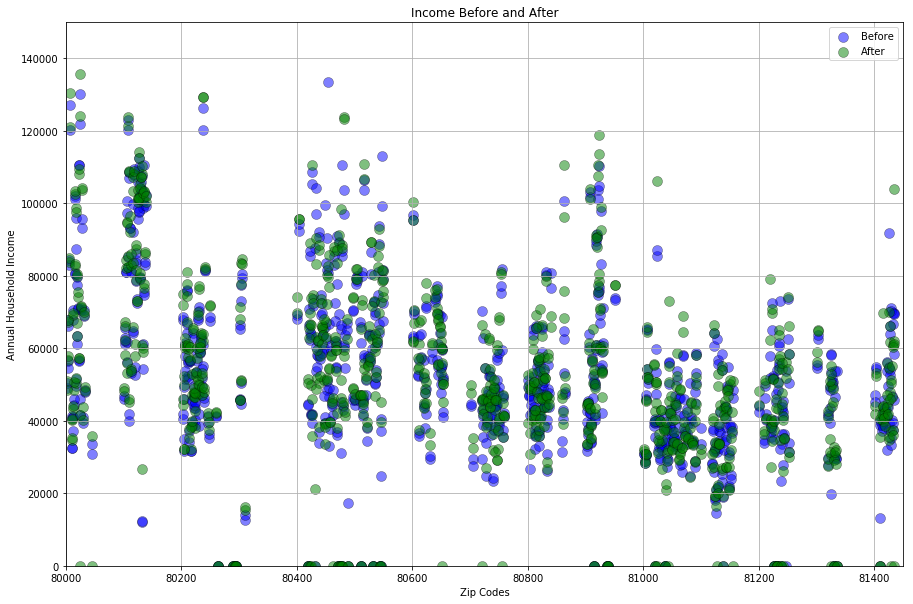

In [335]:
zip_plot = income_clean_df["Zipcode"]
income12_plot = income_clean_df["Total Households Income 2012"]
income13_plot = income_clean_df["Total Households Income 2013"]
income14_plot = income_clean_df["Total Households Income 2014"]
income15_plot = income_clean_df["Total Households Income 2015"]
income16_plot = income_clean_df["Total Households Income 2016"]


Before = plt.scatter(zip_plot, 
            income12_plot, 100, 
            c="blue", 
            edgecolor="black", linewidths=0.5, marker="o", 
            alpha=0.5)

plt.scatter(zip_plot, 
            income13_plot, 100,
            c="blue", 
            edgecolor="black", linewidths=0.5, marker="o", 
            alpha=0.5)

After = plt.scatter(zip_plot, 
            income14_plot, 100,
            c="green", 
            edgecolor="black", linewidths=0.5, marker="o", 
            alpha=0.5)

plt.scatter(zip_plot, 
            income15_plot, 100,
            c="green", 
            edgecolor="black", linewidths=0.5, marker="o", 
            alpha=0.5)

#plt.scatter(zip_plot, 
            #income16_plot, 
            #c="green", 
            #edgecolor="black", linewidths=0.5, marker="o", 
            #alpha=0.5)

# Incorporate the other graph properties
label = ["Before", "After"]
plt.legend(labels = label, handles = [Before, After],loc="best")
plt.title("Income Before and After")
plt.xlabel("Zip Codes")
plt.ylabel("Annual Household Income")
plt.xlim(80000, 81450)
plt.ylim(0, 150000)
plt.gcf().set_size_inches((15, 10))         
plt.grid(True)
plt.savefig("../Income Before and After.png")

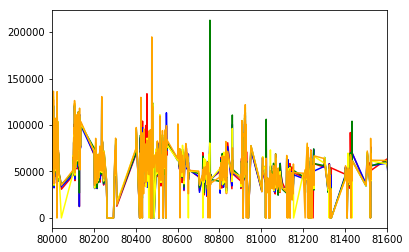

<Figure size 5760x5040 with 0 Axes>

In [22]:

zip_x = income_clean_df["Zipcode"]
income12_y = income_clean_df["Total Households Income 2012"]
income13_y = income_clean_df["Total Households Income 2013"]
income14_y = income_clean_df["Total Households Income 2014"]
income15_y = income_clean_df["Total Households Income 2015"]
income16_y = income_clean_df["Total Households Income 2016"]

plt.plot(zip_x, income12_y, color="red", label="2012")
plt.plot(zip_x, income13_y, color="blue", label="2013")
plt.plot(zip_x, income14_y, color="green", label="2014")
plt.plot(zip_x, income15_y, color="yellow", label="2015")
plt.plot(zip_x, income16_y, color="orange", label="2016")

plt.xlim(80000, 81600)
plt.figure(figsize=(80, 70))
#plt.savefig("../income.png")
plt.show()

In [ ]:
plt.plot(zip_x, income12_y, color="red", label="2012")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income13_y, color="blue", label="2013")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income14_y, color="green", label="2014")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income15_y, color="yellow", label="2015")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income16_y, color="orange", label="2016")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
#merge on zip for cities and export csv

income_clean_df = pd.merge(zip_to_city_df, income_clean_df, on='Zipcode', how='left')

income_clean_df.to_csv("Income/semi_cleaned_income.csv", index=False)

In [52]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2012.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 44 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 44 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 44 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 44 years']

#thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
#thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
#thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
#thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

#thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
#thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
#thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
#thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 64 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 64 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 64 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 64 years']

#sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
#sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
#sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
#sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']


employment_2012_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2012": population,
    "Total Population 2012 Margin of Error": population_margin,
    "Total Unemployment 2012": total_unemployment,
    "Total Unemployment 2012 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2012": sixteen,
    "Age Group 16-19 2012 Margin of Error": sixteen_margin,
    "Age Group 16-19 2012 Unemployment": unemployment16,
    "Age Group 16-19 2012 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2012": twenty,
    "Age Group 20-24 2012 Margin of Error": twenty_margin,
    "Age Group 20-24 2012 Unemployment": unemployment20,
    "Age Group 20-24 2012 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-44 2012": twenty_five,
    "Age Group 25-44 2012 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2012 Unemployment": unemployment25,
    "Age Group 25-44 2012 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    "Age Group 45-54 2012": forty_five,
    "Age Group 45-54 2012 Margin of Error": forty_five_margin,
    "Age Group 45-54 2012 Unemployment": unemployment45,
    "Age Group 45-54 2012 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2012": fifty_five,
    "Age Group 55-64 2012 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2012 Unemployment": unemployment55,
    "Age Group 55-64 2012 Unemployment Margin of Error": fifty_five_unemployment_margin,
    
    "Age Group 65-74 2012": sixty_five,
    "Age Group 65-74 2012 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2012 Unemployment": unemployment65,
    "Age Group 65-74 2012 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2012": seventy_five,
    "Age Group 75+ 2012 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2012 Unemployment": unemployment75,
    "Age Group 75+ 2012 Unemployment Margin of Error": seventy_five_unemployment_margin,

})
employment_2012_df.head()

,Zipcode,Total Population 2012,Total Population 2012 Margin of Error,Total Unemployment 2012,Total Unemployment 2012 margin of Error,Age Group 16-19 2012,Age Group 16-19 2012 Margin of Error,Age Group 16-19 2012 Unemployment,Age Group 16-19 2012 Unemployment Margin of Error,Age Group 20-24 2012,...,Age Group 55-64 2012 Unemployment,Age Group 55-64 2012 Unemployment Margin of Error,Age Group 65-74 2012,Age Group 65-74 2012 Margin of Error,Age Group 65-74 2012 Unemployment,Age Group 65-74 2012 Unemployment Margin of Error,Age Group 75+ 2012,Age Group 75+ 2012 Margin of Error,Age Group 75+ 2012 Unemployment,Age Group 75+ 2012 Unemployment Margin of Error
0,67879.0,1020.0,80.0,1.2,1.6,87.0,38.0,0.0,33.8,30.0,...,0.0,16.1,128.0,31.0,0.0,44.6,164.0,35.0,0.0,86.7
1,80002.0,15071.0,757.0,7.0,1.8,703.0,239.0,23.5,15.9,1518.0,...,10.1,3.7,1313.0,227.0,0.0,11.8,757.0,167.0,0.0,25.2
2,80003.0,27595.0,719.0,9.8,1.7,1699.0,319.0,28.1,8.9,2553.0,...,11.9,4.1,2233.0,290.0,6.6,8.1,1670.0,229.0,18.3,27
3,80004.0,28369.0,707.0,8.0,1.3,1595.0,227.0,22.2,8.6,1958.0,...,6.7,2.7,2737.0,200.0,8.3,6.1,3242.0,266.0,0.0,17.9
4,80005.0,21325.0,574.0,6.3,1.1,1635.0,262.0,29.1,11.8,1277.0,...,3.7,2,2162.0,222.0,4.1,3.9,1241.0,228.0,5.7,20


In [294]:
city_2012_df = pd.merge(dispensary_df, employment_2012_df, how="left")
city_2012_df.sort_values(by=["Total Unemployment 2012"], ascending=True)


,License,Street,City,Zipcode,Total Population 2012,Total Population 2012 Margin of Error,Total Unemployment 2012,Total Unemployment 2012 margin of Error,Age Group 16-19 2012,Age Group 16-19 2012 Margin of Error,...,Age Group 55-64 2012 Unemployment,Age Group 55-64 2012 Unemployment Margin of Error,Age Group 65-74 2012,Age Group 65-74 2012 Margin of Error,Age Group 65-74 2012 Unemployment,Age Group 65-74 2012 Unemployment Margin of Error,Age Group 75+ 2012,Age Group 75+ 2012 Margin of Error,Age Group 75+ 2012 Unemployment,Age Group 75+ 2012 Unemployment Margin of Error
189,402R-00679,49348 Highway 285,Grant,80448,130.0,103.0,0.0,31.4,7.0,11.0,...,0.0,85.4,52.0,57.0,0.0,70.6,0.0,12.0,0.0,**
233,402R-00574,8 County Road 821,Tabernash,80478,587.0,390.0,0.0,8.5,111.0,115.0,...,0.0,41.5,122.0,169.0,0.0,100,7.0,12.0,0.0,**
243,402R-00354,"72399 US Highway 40, Unit B",Tabernash,80478,587.0,390.0,0.0,8.5,111.0,115.0,...,0.0,41.5,122.0,169.0,0.0,100,7.0,12.0,0.0,**
330,402R-00580,513 North Main Street,Alma,80420,590.0,179.0,1.2,1.5,32.0,31.0,...,0.0,44,18.0,4.0,0.0,72.5,0.0,12.0,0.0,**
219,402R-00092,40 South Main Street,Alma,80420,590.0,179.0,1.2,1.5,32.0,31.0,...,0.0,44,18.0,4.0,0.0,72.5,0.0,12.0,0.0,**
416,402R-00065,13 East Park Avenue,Empire,80438,269.0,85.0,1.6,2.7,24.0,19.0,...,0.0,40.4,21.0,18.0,0.0,**,10.0,12.0,0.0,**
417,402R-00776,433 East Park Avenue,Empire,80438,269.0,85.0,1.6,2.7,24.0,19.0,...,0.0,40.4,21.0,18.0,0.0,**,10.0,12.0,0.0,**
418,402R-00559,"79025 US Highway 40, Units 5-6",Winter Park,80482,963.0,308.0,2.0,2.8,34.0,44.0,...,0.0,23.8,97.0,78.0,0.0,88.8,58.0,60.0,0.0,**
425,402R-00366,"511 Zerex Street, Suite 203",Fraser,80442,2292.0,643.0,2.5,2.8,54.0,56.0,...,1.6,2.4,278.0,166.0,0.0,17.6,18.0,26.0,0.0,**
415,402R-00312,228 Byers Avenue,Fraser,80442,2292.0,643.0,2.5,2.8,54.0,56.0,...,1.6,2.4,278.0,166.0,0.0,17.6,18.0,26.0,0.0,**


18.6

In [290]:
dispensary_count = city_2012_df.groupby(["City"]).count()["License"]


City
Alma                   2
Antonito               3
Aspen                  7
Aurora                23
Avon                   4
Bailey                 2
Basalt                 2
Berthoud               2
Black Hawk             2
Boulder               26
Breckenridge           4
Carbondale             4
Central City           5
Colorado City          1
Commerce City          6
Cortez                 6
Crested Butte          4
Crestone               1
De Beque               4
Denver               178
Dillon                 3
Dinosaur               3
Dumont                 3
Durango               11
Eagle                  1
Edgewater              6
Edwards                2
Empire                 2
Englewood              2
Fairplay               1
                    ... 
Mountain View          2
Nederland              3
Niwot                  1
Northglenn             6
Oak Creek              1
Ordway                 1
Pagosa Springs         5
Palisade               3
Parachute           

In [ ]:
years = ["2012", "2013", "2014", "2015", "2016"]
income = [total_2012, total_2013, total_2014, total_2015, total_2016]
x_axis = np.arange(len(years))
plt.bar(x_axis, income)
plt.title("Median Household Income, Colorado")
plt.xlabel("Years")
plt.ylabel("Median Household Income")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2012", "2013", "2014", "2015", "2016"])
plt.savefig("../Median Household Income, CO.png")
plt.show()

In [53]:
avg_total_2012 = employment_2012_df["Total Unemployment 2012"].mean()
avg_group16_2012 = employment_2012_df["Age Group 16-19 2012 Unemployment"].mean()
avg_group20_2012 = employment_2012_df["Age Group 20-24 2012 Unemployment"].mean()
avg_group25_2012 = employment_2012_df["Age Group 25-44 2012 Unemployment"].mean()
avg_group45_2012 = employment_2012_df["Age Group 45-54 2012 Unemployment"].mean()
avg_group55_2012 = employment_2012_df["Age Group 55-64 2012 Unemployment"].mean()
avg_group65_2012 = employment_2012_df["Age Group 65-74 2012 Unemployment"].mean()
avg_group75_2012 = employment_2012_df["Age Group 75+ 2012 Unemployment"].mean()

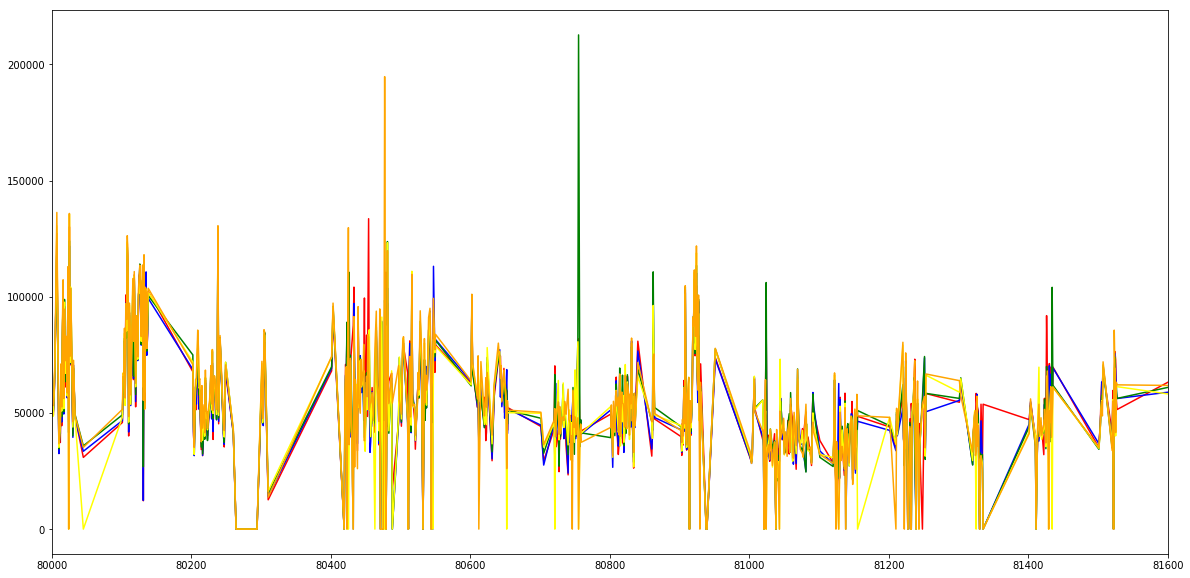

In [99]:
zip_x = income_clean_df["Zipcode"]
income12_y = income_clean_df["Total Households Income 2012"]
income13_y = income_clean_df["Total Households Income 2013"]
income14_y = income_clean_df["Total Households Income 2014"]
income15_y = income_clean_df["Total Households Income 2015"]
income16_y = income_clean_df["Total Households Income 2016"]

plt.plot(zip_x, income12_y, color="red", label="2012")
plt.plot(zip_x, income13_y, color="blue", label="2013")
plt.plot(zip_x, income14_y, color="green", label="2014")
plt.plot(zip_x, income15_y, color="yellow", label="2015")
plt.plot(zip_x, income16_y, color="orange", label="2016")

plt.xlim(80000, 81600)
zip_x.plot(figsize=[20,10])

#plt.savefig("../income.png")
plt.show()

In [ ]:
#merge on zip for cities

income_clean_df = pd.merge(zip_to_city_df, employment_2012_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2012.csv", index=False)

income_clean_df.head()

In [47]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2013.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 44 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 44 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 44 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 44 years']

#thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
#thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
#thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
#thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

#thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
#thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
#thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
#thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 64 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 64 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 64 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 64 years']

#sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
#sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
#sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
#sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']




employment_2013_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2013": population,
    "Total Population 2013 Margin of Error": population_margin,
    "Total Unemployment 2013": total_unemployment,
    "Total Unemployment 2013 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2013": sixteen,
    "Age Group 16-19 2013 Margin of Error": sixteen_margin,
    "Age Group 16-19 2013 Unemployment": unemployment16,
    "Age Group 16-19 2013 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2013": twenty,
    "Age Group 20-24 2013 Margin of Error": twenty_margin,
    "Age Group 20-24 2013 Unemployment": unemployment20,
    "Age Group 20-24 2013 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-44 2013": twenty_five,
    "Age Group 25-44 2013 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2013 Unemployment": unemployment25,
    "Age Group 25-44 2013 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    "Age Group 45-54 2013": forty_five,
    "Age Group 45-54 2013 Margin of Error": forty_five_margin,
    "Age Group 45-54 2013 Unemployment": unemployment45,
    "Age Group 45-54 2013 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2013": fifty_five,
    "Age Group 55-64 2013 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2013 Unemployment": unemployment55,
    "Age Group 55-64 2013 Unemployment Margin of Error": fifty_five_unemployment_margin,
    
    "Age Group 65-74 2013": sixty_five,
    "Age Group 65-74 2013 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2013 Unemployment": unemployment65,
    "Age Group 65-74 2013 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2013": seventy_five,
    "Age Group 75+ 2013 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2013 Unemployment": unemployment75,
    "Age Group 75+ 2013 Unemployment Margin of Error": seventy_five_unemployment_margin,

})


In [48]:
avg_total_2013 = employment_2013_df["Total Unemployment 2013"].mean()
avg_group16_2013 = employment_2013_df["Age Group 16-19 2013 Unemployment"].mean()
avg_group20_2013 = employment_2013_df["Age Group 20-24 2013 Unemployment"].mean()
avg_group25_2013 = employment_2013_df["Age Group 25-44 2013 Unemployment"].mean()
avg_group45_2013 = employment_2013_df["Age Group 45-54 2013 Unemployment"].mean()
avg_group55_2013 = employment_2013_df["Age Group 55-64 2013 Unemployment"].mean()
avg_group65_2013 = employment_2013_df["Age Group 65-74 2013 Unemployment"].mean()
avg_group75_2013 = employment_2013_df["Age Group 75+ 2013 Unemployment"].mean()

In [ ]:
income_clean_df = pd.merge(zip_to_city_df, employment_2013_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2013.csv", index=False)

income_clean_df.head()

In [75]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2014.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 44 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 44 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 44 years']

#thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
#thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
#thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
#thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

#thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
#thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
#thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
#thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 64 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 64 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 64 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 64 years']

#sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
#sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
#sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
#sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']

employment_2014_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2014": population,
    "Total Population 2014 Margin of Error": population_margin,
    "Total Unemployment 2014":total_unemployment,
    "Total Unemployment 2014 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2014": sixteen,
    "Age Group 16-19 2014 Margin of Error": sixteen_margin,
    "Age Group 16-19 2014 Unemployment": unemployment16,
    "Age Group 16-19 2014 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2014": twenty,
    "Age Group 20-24 2014 Margin of Error": twenty_margin,
    "Age Group 20-24 2014 Unemployment": unemployment20,
    "Age Group 20-24 2014 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-44 2014": twenty_five,
    "Age Group 25-44 2014 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2014 Unemployment": unemployment25,
    "Age Group 25-44 2014 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    "Age Group 45-54 2014": forty_five,
    "Age Group 45-54 2014 Margin of Error": forty_five_margin,
    "Age Group 45-54 2014 Unemployment": unemployment45,
    "Age Group 45-54 2014 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2014": fifty_five,
    "Age Group 55-64 2014 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2014 Unemployment": unemployment55,
    "Age Group 55-64 2014 Unemployment Margin of Error": fifty_five_unemployment_margin,
    
    "Age Group 65-74 2014": sixty_five,
    "Age Group 65-74 2014 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2014 Unemployment": unemployment65,
    "Age Group 65-74 2014 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2014": seventy_five,
    "Age Group 75+ 2014 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2014 Unemployment": unemployment75,
    "Age Group 75+ 2014 Unemployment Margin of Error": seventy_five_unemployment_margin,

})


In [55]:
avg_total_2014 = employment_2014_df["Total Unemployment 2014"].mean()
avg_group16_2014 = employment_2014_df["Age Group 16-19 2014 Unemployment"].mean()
avg_group20_2014 = employment_2014_df["Age Group 20-24 2014 Unemployment"].mean()
avg_group25_2014 = employment_2014_df["Age Group 25-44 2014 Unemployment"].mean()
avg_group45_2014 = employment_2014_df["Age Group 45-54 2014 Unemployment"].mean()
avg_group55_2014 = employment_2014_df["Age Group 55-64 2014 Unemployment"].mean()
avg_group65_2014 = employment_2014_df["Age Group 65-74 2014 Unemployment"].mean()
avg_group75_2014 = employment_2014_df["Age Group 75+ 2014 Unemployment"].mean()

In [ ]:
income_clean_df = pd.merge(zip_to_city_df, employment_2014_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2014.csv", index=False)

income_clean_df.head()

In [258]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2015.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 29 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 29 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 29 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 29 years']

thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
unemployment30 = pd.to_numeric(thirty_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
unemployment35 = pd.to_numeric(thirty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 59 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 59 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 59 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 59 years']

sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
unemployment60 = pd.to_numeric(sixty_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']

employment_2015_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2015": population,
    "Total Population 2015 Margin of Error": population_margin,
    "Total Unemployment 2015": total_unemployment,
    "Total Unemployment 2015 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2015": sixteen,
    "Age Group 16-19 2015 Margin of Error": sixteen_margin,
    "Age Group 16-19 2015 Unemployment": unemployment16,
    "Age Group 16-19 2015 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2015": twenty,
    "Age Group 20-24 2015 Margin of Error": twenty_margin,
    "Age Group 20-24 2015 Unemployment": unemployment20,
    "Age Group 20-24 2015 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-29 2015": twenty_five,
    "Age Group 25-29 2015 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2015 Unemployment": unemployment25 + unemployment30 + unemployment35,
    "Age Group 25-29 2015 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    #"Age Group 30-34 2015": thirty,
    #"Age Group 30-34 2015 Margin of Error": thirty_margin,
    #"Age Group 30-34 2015 Unemployment": unemployment30,
    #"Age Group 30-34 2015 Unemployment Margin of Error": thirty_unemployment_margin,

    #"Age Group 35-44 2015": thirty_five,
    #"Age Group 35-44 2015 Margin of Error": thirty_five_margin,
    #"Age Group 35-44 2015 Unemployment": unemployment35,
    #"Age Group 35-44 2015 Unemployment Margin of Error": thirty_five_unemployment_margin,

    "Age Group 45-54 2015": forty_five,
    "Age Group 45-54 2015 Margin of Error": forty_five_margin,
    "Age Group 45-54 2015 Unemployment": unemployment45,
    "Age Group 45-54 2015 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2015": fifty_five,
    "Age Group 55-64 2015 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2015 Unemployment": unemployment55,
    "Age Group 55-64 2015 Unemployment Margin of Error": fifty_five_unemployment_margin,

    "Age Group 60-64 2015": sixty,
    "Age Group 60-64 2015 Margin of Error": sixty_margin,
    "Age Group 60-64 2015 Unemployment": unemployment60,
    "Age Group 60-64 2015 Unemployment Margin of Error": sixty_unemployment_margin,
    
    "Age Group 65-74 2015": sixty_five,
    "Age Group 65-74 2015 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2015 Unemployment": unemployment65,
    "Age Group 65-74 2015 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2015": seventy_five,
    "Age Group 75+ 2015 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2015 Unemployment": unemployment75,
    "Age Group 75+ 2015 Unemployment Margin of Error": seventy_five_unemployment_margin,

})


In [259]:
avg_total_2015 = employment_2015_df["Total Unemployment 2015"].mean()
avg_group16_2015 = employment_2015_df["Age Group 16-19 2015 Unemployment"].mean()
avg_group20_2015 = employment_2015_df["Age Group 20-24 2015 Unemployment"].mean()
avg_group25_2015 = employment_2015_df["Age Group 25-44 2015 Unemployment"].mean()/3
avg_group45_2015 = employment_2015_df["Age Group 45-54 2015 Unemployment"].mean()
avg_group55_2015 = employment_2015_df["Age Group 55-64 2015 Unemployment"].mean()
avg_group65_2015 = employment_2015_df["Age Group 65-74 2015 Unemployment"].mean()
avg_group75_2015 = employment_2015_df["Age Group 75+ 2015 Unemployment"].mean()


In [ ]:
income_clean_df = pd.merge(zip_to_city_df, employment_2015_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2015.csv", index=False)

income_clean_df.head()

In [234]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2016.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 29 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 29 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 29 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 29 years']

thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
unemployment30 = pd.to_numeric(thirty_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
unemployment35 = pd.to_numeric(thirty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 59 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 59 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 59 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 59 years']

sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
unemployment60 = pd.to_numeric(sixty_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']




employment_2016_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2016": population,
    "Total Population 2016 Margin of Error": population_margin,
    "Total Unemployment 2016": total_unemployment,
    "Total Unemployment 2016 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2016": sixteen,
    "Age Group 16-19 2016 Margin of Error": sixteen_margin,
    "Age Group 16-19 2016 Unemployment": unemployment16,
    "Age Group 16-19 2016 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2016": twenty,
    "Age Group 20-24 2016 Margin of Error": twenty_margin,
    "Age Group 20-24 2016 Unemployment": unemployment20,
    "Age Group 20-24 2016 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-29 2016": twenty_five,
    "Age Group 25-29 2016 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2016 Unemployment": unemployment25 + unemployment30 + unemployment35 / 3,
    "Age Group 25-29 2016 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    #"Age Group 30-34 2016": thirty,
    #"Age Group 30-34 2016 Margin of Error": thirty_margin,
    #"Age Group 30-34 2016 Unemployment": unemployment30,
    #"Age Group 30-34 2016 Unemployment Margin of Error": thirty_unemployment_margin,

    #"Age Group 35-44 2016": thirty_five,
    #"Age Group 35-44 2016 Margin of Error": thirty_five_margin,
    #"Age Group 35-44 2016 Unemployment": unemployment35,
    #"Age Group 35-44 2016 Unemployment Margin of Error": thirty_five_unemployment_margin,

    "Age Group 45-54 2016": forty_five,
    "Age Group 45-54 2016 Margin of Error": forty_five_margin,
    "Age Group 45-54 2016 Unemployment": unemployment45,
    "Age Group 45-54 2016 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2016": fifty_five,
    "Age Group 55-64 2016 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2016 Unemployment": unemployment55,
    "Age Group 55-64 2016 Unemployment Margin of Error": fifty_five_unemployment_margin,

    "Age Group 60-64 2016": sixty,
    "Age Group 60-64 2016 Margin of Error": sixty_margin,
    "Age Group 60-64 2016 Unemployment": unemployment60,
    "Age Group 60-64 2016 Unemployment Margin of Error": sixty_unemployment_margin,
    
    "Age Group 65-74 2016": sixty_five,
    "Age Group 65-74 2016 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2016 Unemployment": unemployment65,
    "Age Group 65-74 2016 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2016": seventy_five,
    "Age Group 75+ 2016 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2016 Unemployment": unemployment75,
    "Age Group 75+ 2016 Unemployment Margin of Error": seventy_five_unemployment_margin,

})



In [260]:
avg_total_2016 = employment_2016_df["Total Unemployment 2016"].mean()
avg_group16_2016 = employment_2016_df["Age Group 16-19 2016 Unemployment"].mean()
avg_group20_2016 = employment_2016_df["Age Group 20-24 2016 Unemployment"].mean()
avg_group25_2016 = employment_2016_df["Age Group 25-44 2016 Unemployment"].mean()/3
avg_group45_2016 = employment_2016_df["Age Group 45-54 2016 Unemployment"].mean()
avg_group55_2016 = employment_2016_df["Age Group 55-64 2016 Unemployment"].mean()
avg_group65_2016 = employment_2016_df["Age Group 65-74 2016 Unemployment"].mean()
avg_group75_2016 = employment_2016_df["Age Group 75+ 2016 Unemployment"].mean()

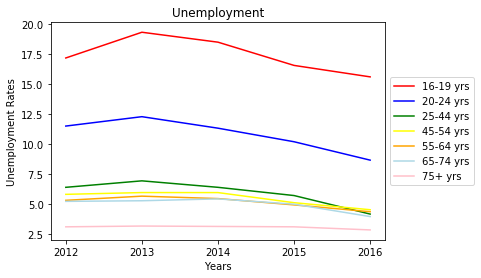

In [261]:
#x_years = ["16-19 yrs", "20-24 yrs", "25-44 yrs", "45-54 yrs", "55-64 yrs", "65-74 yrs", "75+ yrs"]
#y_2012 = [avg_group16_2012, avg_group20_2012, avg_group25_2012, avg_group45_2012, avg_group55_2012, avg_group65_2012, avg_group75_2012]

x_years = ["2012", "2013", "2014", "2015", "2016"]
y_group16 = [avg_group16_2012, avg_group16_2013, avg_group16_2014, avg_group16_2015, avg_group16_2016]
y_group20 = [avg_group20_2012, avg_group20_2013, avg_group20_2014, avg_group20_2015, avg_group20_2016]
y_group25 = [avg_group25_2012, avg_group25_2013, avg_group25_2014, avg_group25_2015, avg_group25_2016]
y_group45 = [avg_group45_2012, avg_group45_2013, avg_group45_2014, avg_group45_2015, avg_group45_2016]
y_group55 = [avg_group55_2012, avg_group55_2013, avg_group55_2014, avg_group55_2015, avg_group55_2016]
y_group65 = [avg_group65_2012, avg_group65_2013, avg_group65_2014, avg_group65_2015, avg_group65_2016]
y_group75 = [avg_group75_2012, avg_group75_2013, avg_group75_2014, avg_group75_2015, avg_group75_2016]

plt.plot(x_years, y_group16, color="red", label="16-19 yrs")
plt.plot(x_years, y_group20, color="blue", label="20-24 yrs")
plt.plot(x_years, y_group25, color="green", label="25-44 yrs")
plt.plot(x_years, y_group45, color="yellow", label="45-54 yrs")
plt.plot(x_years, y_group55, color="orange", label="55-64 yrs")
plt.plot(x_years, y_group65, color="lightblue", label="65-74 yrs")
plt.plot(x_years, y_group75, color="pink", label="75+ yrs")

plt.title("Unemployment")
plt.xlabel("Years")
plt.ylabel("Unemployment Rates")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("../Unemployment by Age Group.png")
plt.show()

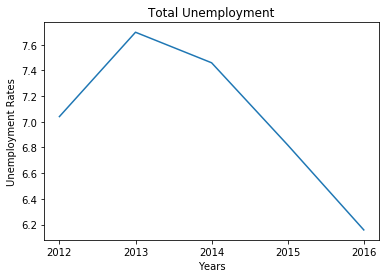

In [183]:
x_years = ["2012", "2013", "2014", "2015", "2016"]
y_group_total = [avg_total_2012, avg_total_2013, avg_total_2014, avg_total_2015, avg_total_2016]
plt.plot(x_years, y_group_total)
plt.title("Total Unemployment")
plt.xlabel("Years")
plt.ylabel("Unemployment Rates")
plt.savefig("../Total Unemployment.png")
plt.show()

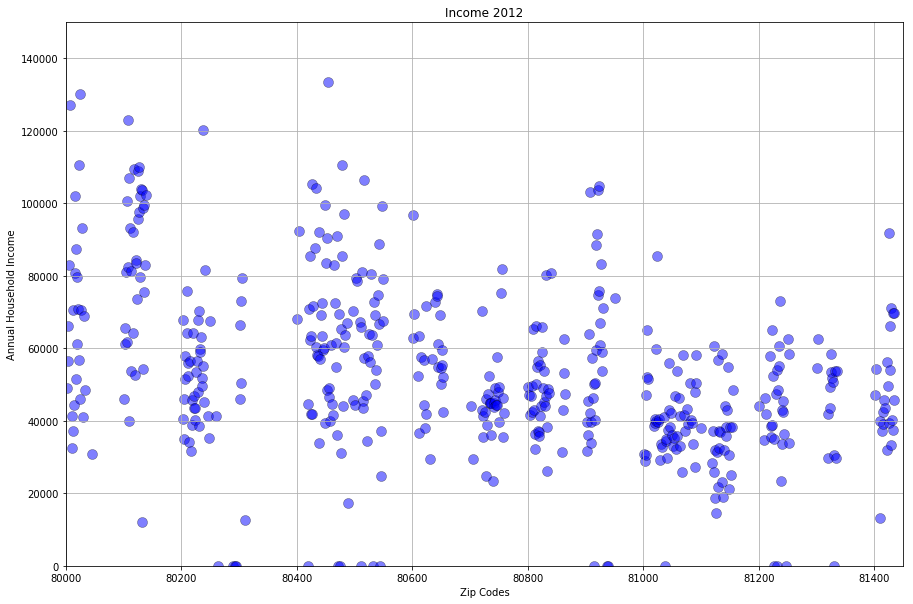

In [204]:
zip_plot = income_clean_df["Zipcode"]
income12_plot = income_clean_df["Total Households Income 2012"]

Before = plt.scatter(zip_plot, 
            income12_plot, 100, 
            c="blue", 
            edgecolor="black", linewidths=0.5, marker="o", 
            alpha=0.5)

# Incorporate the other graph properties
#label = ["Before", "After"]
#plt.legend(labels = label, handles = [Before, After],loc="best")
plt.title("Income 2012")
plt.xlabel("Zip Codes")
plt.ylabel("Annual Household Income")
plt.xlim(80000, 81450)
plt.ylim(0, 150000)
plt.gcf().set_size_inches((15, 10))         
plt.grid(True)
plt.savefig("../Income 2012.png")

In [14]:
income_clean_df = pd.merge(zip_to_city_df, employment_2016_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2016.csv", index=False)

income_clean_df.head()

NameError: name 'zip_to_city_df' is not defined

In [ ]:
zip_x = income_clean_df["Zipcode"]
income12_y = income_clean_df["Total Households Income 2012"].interpolate()


plt.plot(zip_x, income12_y, color="red", label="2012")
#plt.plot(zip_x, income13_y, color="blue", label="2013")
#plt.plot(zip_x, income14_y, color="green", label="2014")
#plt.plot(zip_x, income15_y, color="yellow", label="2015")
#plt.plot(zip_x, income16_y, color="orange", label="2016")

#plt.xlim(80000, 81700)
#plt.savefig("../Images/income.png")
plt.show()
